# Data Circle Notebook 3

This notebook will introduce how we make **visualizations and graphs** using Pandas

Don't forget about importing the pandas library and importing your dataset:

In [ ]:
import pandas as pd

In [ ]:
df= pd.read_csv("PittsTrees.csv")

## Starting with only using 2 variables
When creating graphs there are so so so many different graphs you can create with different information. We will start simply by using only 2 variables to create a line graph. I recommend having one of your variables be **time** so you have a graph of something occurring over time.

I will show an example below using a dataframe on trees in Pittsburgh (https://data.wprdc.org/dataset/city-trees), you should follow along with your own dataset to create your own graph!

In [ ]:
df

## Step 1: decide what columns you would like to use!

In [ ]:
df.columns

## Step 2: Make a mini dataframe
Once you have decided make a smaller dataframe with all of the columns you will use! 

I decided to use the 3 columns below in order to compare the growth space of a tree vs. its dollar amount of air quality benefits. Don't forget to assign your new data frame to a variable name!

In [ ]:
trees = df[['common_name', 'growth_space_width', 'air_quality_benfits_total_dollar_value']]
trees

In [ ]:
trees = trees.dropna()
trees

## Step 3: if you need, make more changes to your dataframe
I am deciding I just want to look at Red Maple trees.

In [ ]:
trees = df[['common_name', 'growth_space_width', 'air_quality_benfits_total_dollar_value']]
trees

In [ ]:
maple_red = maple_red.drop(columns = 'common_name').groupby('growth_space_width').mean()
maple_red

## Step 4: Graph time!!


In [ ]:
maple_red.plot()

## Graphing with multiple variables
What if I wanted compare multiple trees at once to see which one has the best quality benfits and small growth space?

In [ ]:
trees

## Step 1: Find which other variables you want to compare with
I want to compare Red Maple trees with other popular trees in Pittsburgh. So lets find the top counted trees in this dataset. 

In [ ]:
counted_trees = trees.groupby('common_name').count().sort_values('growth_space_width', ascending = False)
counted_trees

In [ ]:
top_3 = counted_trees[0:3].reset_index()['common_name']
top_3

## Step 2: Moving things around with our friends groupby and pivot
In order to have a graph with multiple lines you need each of those categories to be their own columns. To do this you often need to use groupby and or pivot. 

**Tip:** When doing this, think of the columns as each of the different lines on the graph, the index as the x-axis, and the values in the box as the y-axis. 

Below I will be using both groupby and pivot on my data frame to have a data frame that has columns for each of the tree types, an index of the growth space, and values of the dollar amount of air quality benefits. 

In [ ]:
grouped_trees = trees.groupby(['common_name', 'growth_space_width']).mean().reset_index()
grouped_trees

In [ ]:
pivot_trees = grouped_trees.pivot(values = 'air_quality_benfits_total_dollar_value', 
                   columns = 'common_name', 
                    index = 'growth_space_width')
pivot_trees

## Step 3: Grab the columns with the varibles you found in step 1

0       Maple: Norway
1          Maple: Red
2    London planetree
Name: common_name, dtype: object

In [163]:
top_trees = pivot_trees[top_3]
top_trees

common_name,Maple: Norway,Maple: Red,London planetree
growth_space_width,,,
0.0,9.078277,5.514133,15.376766
1.0,4.629221,6.092467,13.693594
2.0,5.677649,5.404521,18.556751
3.0,6.389758,5.210844,17.304930
3.5,NaN,NaN,NaN
4.0,7.158487,3.015620,10.828658
4.5,NaN,NaN,0.069626
5.0,6.927062,2.678935,12.935180
6.0,8.184600,2.718254,17.574720


In [167]:
top_trees = top_trees.dropna()
top_trees

common_name,Maple: Norway,Maple: Red,London planetree
growth_space_width,,,
0.0,9.078277,5.514133,15.376766
1.0,4.629221,6.092467,13.693594
2.0,5.677649,5.404521,18.556751
3.0,6.389758,5.210844,17.304930
4.0,7.158487,3.015620,10.828658
5.0,6.927062,2.678935,12.935180
6.0,8.184600,2.718254,17.574720
7.0,7.501726,7.021506,15.036998
8.0,5.970238,4.098979,4.910702


## Step 4: Graph time!!

<Axes: xlabel='growth_space_width'>

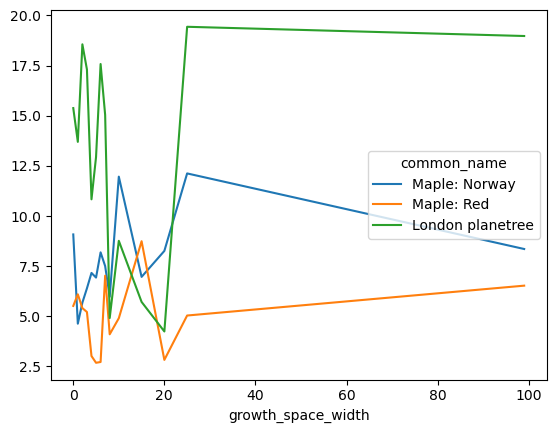

In [165]:
top_trees.dropna().plot()

Woah!! Cool graph but it is hard to tell what is happening because there are no labels on the axies. 

## Step 5: Make it make sense
Add labels and edit the x and y axis limits to make the trends the graph is showing more clear

<Axes: title={'center': 'Tree Space Width vs Air Quality Benifits in Top 3 Most Popular Trees'}, xlabel='Tree Space Width (ft)', ylabel='Air Quality Benifits ($)'>

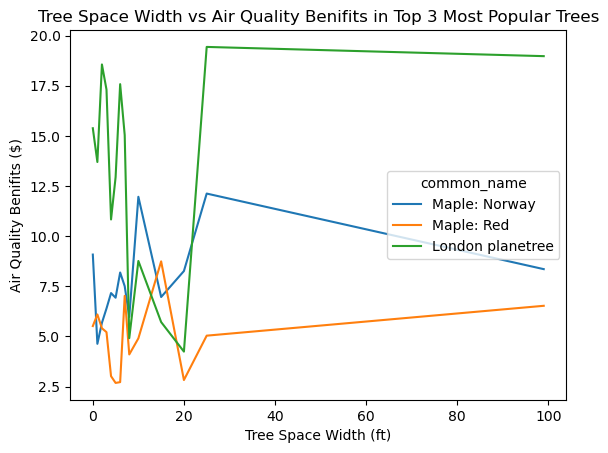

In [169]:
top_trees.plot(title = 'Tree Space Width vs Air Quality Benifits in Top 3 Most Popular Trees', 
               xlabel = 'Tree Space Width (ft)', ylabel = 'Air Quality Benifits ($)')

This graph shows that London Planetrees provide the most air quality benefits for smaller growth spaces. However is this graph the best way to show this? We will explore this next time by looking at other plot libraries!

## Now try it on your own graph!
Try this out and if you find you need to express your information in another form like a bar or scatter plot check out the plot functions on the pandas functions website we looked at last week!

If your data is still not represented well by these graphs then hold on for next week where we will check out seaborn graphs!